In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## DF Manipulation

In [4]:
rawdata1 = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="Transactions", header=1)
rawdata1

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [5]:
rawdata2 = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic", header=1)
rawdata2

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\3730221764.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  rawdata2 = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic", header=1)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [6]:
rawdata3 = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerAddress", header=1)
rawdata3

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [7]:
df1 = pd.merge(rawdata1, rawdata2, on="customer_id")
df1

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,19854,68,130,2017-02-02,1.0,Approved,OHM Cycles,Standard,medium,medium,...,Male,32,1997-07-18,Chemical Engineer,Manufacturing,Mass Customer,N,-100,No,1.0
19993,17966,17,2789,2017-12-06,0.0,Approved,Solex,Standard,high,medium,...,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,7.0
19994,18462,80,2789,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,...,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,7.0
19995,17981,69,3446,2017-12-26,1.0,Approved,Giant Bicycles,Road,medium,medium,...,Male,8,1967-01-30,Structural Engineer,Manufacturing,Mass Customer,N,NaN,No,14.0


In [8]:
df = pd.merge(df1, rawdata3, on="customer_id")
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,19854,68,130,2017-02-02,1.0,Approved,OHM Cycles,Standard,medium,medium,...,Mass Customer,N,-100,No,1.0,58 Helena Hill,2205,New South Wales,Australia,7
19964,17966,17,2789,2017-12-06,0.0,Approved,Solex,Standard,high,medium,...,Affluent Customer,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,7.0,724 West Park,2112,NSW,Australia,11
19965,18462,80,2789,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,...,Affluent Customer,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,7.0,724 West Park,2112,NSW,Australia,11
19966,17981,69,3446,2017-12-26,1.0,Approved,Giant Bicycles,Road,medium,medium,...,Mass Customer,N,NaN,No,14.0,8 Becker Drive,4868,QLD,Australia,4


In [9]:
df_imp = df[['brand', 'product_line', 'product_class', 'list_price', 'standard_cost','gender', 'past_3_years_bike_related_purchases','job_title','job_industry_category', 'wealth_segment', 'deceased_indicator','owns_car', 'tenure', 'postcode', 'state', 'property_valuation']]

In [10]:
df_imp

,brand,product_line,product_class,list_price,standard_cost,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation
0,Solex,Standard,medium,71.49,53.62,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,3064,VIC,6
1,Giant Bicycles,Standard,medium,1403.50,954.82,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,3064,VIC,6
2,Solex,Standard,medium,478.16,298.72,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,3064,VIC,6
3,Trek Bicycles,Standard,medium,2091.47,388.92,Female,89,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,2196,NSW,5
4,Giant Bicycles,Standard,high,1129.13,677.48,Female,89,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,2196,NSW,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,OHM Cycles,Standard,medium,1636.90,44.71,Male,32,Chemical Engineer,Manufacturing,Mass Customer,N,No,1.0,2205,New South Wales,7
19964,Solex,Standard,high,1024.66,614.80,Female,66,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,2112,NSW,11
19965,OHM Cycles,Touring,low,1073.07,933.84,Female,66,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,2112,NSW,11
19966,Giant Bicycles,Road,medium,792.90,594.68,Male,8,Structural Engineer,Manufacturing,Mass Customer,N,No,14.0,4868,QLD,4


In [11]:
df_imp["profit"] = df_imp['list_price']-df_imp['standard_cost']

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\2691758553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp["profit"] = df_imp['list_price']-df_imp['standard_cost']


# Univariate Analysis

## Brand

In [12]:
le_brand = LabelEncoder()
df_imp.iloc[:,0] = le_brand.fit_transform(df_imp.iloc[:,0])

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\2506441992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp.iloc[:,0] = le_brand.fit_transform(df_imp.iloc[:,0])


In [13]:
list(le_brand.classes_)

['Giant Bicycles',
 'Norco Bicycles',
 'OHM Cycles',
 'Solex',
 'Trek Bicycles',
 'WeareA2B',
 nan]

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot - Brand')

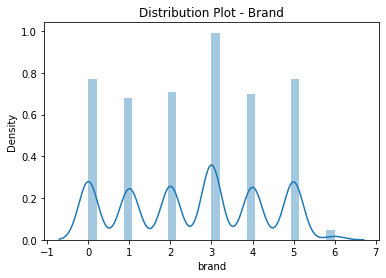

In [76]:
sns.distplot(df_imp['brand'])
plt.title("Distribution Plot - Brand")

## product_line

In [15]:
le_pl = LabelEncoder()
df_imp.iloc[:,1] = le_pl.fit_transform(df_imp.iloc[:,1])

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\2277213688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp.iloc[:,1] = le_pl.fit_transform(df_imp.iloc[:,1])


In [16]:
list(le_pl.classes_)

['Mountain', 'Road', 'Standard', 'Touring', nan]

Text(0, 0.5, 'Count')

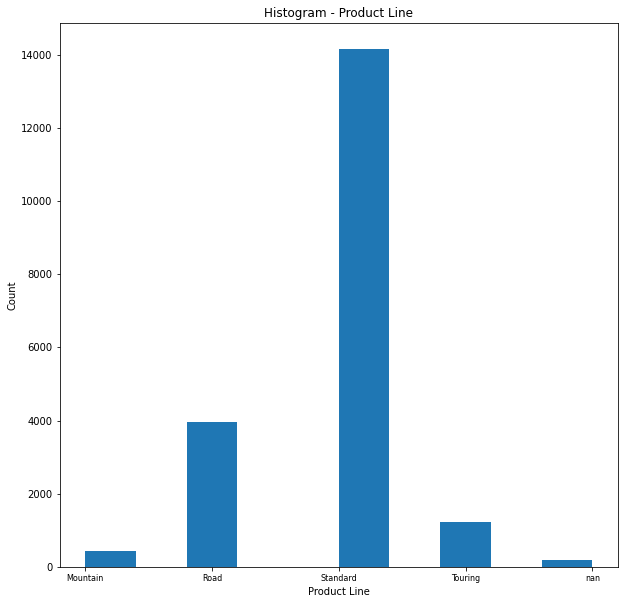

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.hist(df_imp["product_line"], align='mid')

ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(list(le_pl.classes_), fontsize=8)

plt.title("Histogram - Product Line")
plt.xlabel("Product Line")
plt.ylabel("Count")

## product_class

In [18]:
df["product_class"].unique()

array(['medium', 'high', 'low', nan], dtype=object)

In [19]:
le_pc = LabelEncoder()
df_imp.iloc[:,2] = le_pc.fit_transform(df_imp.iloc[:,2])

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\932269293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp.iloc[:,2] = le_pc.fit_transform(df_imp.iloc[:,2])


In [20]:
list(le_pc.classes_)

['high', 'low', 'medium', nan]

Text(0, 0.5, 'Count')

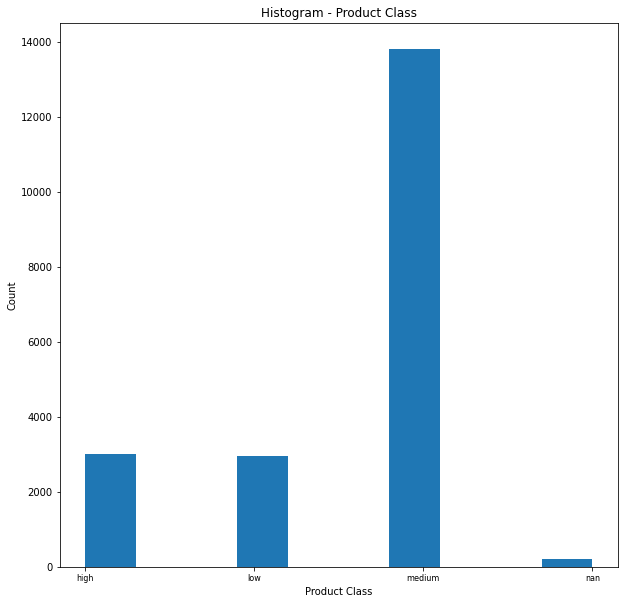

In [98]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.hist(df_imp["product_class"])

ax.set_xticks([0,1,2,3])
ax.set_xticklabels(list(le_pc.classes_), fontsize=8)

plt.title("Histogram - Product Class")
plt.xlabel("Product Class")
plt.ylabel("Count")

## Gender

In [22]:
df["gender"].unique()

array(['Male', 'Female', 'U', 'F', 'M', 'Femal'], dtype=object)

In [23]:
df_imp["gender"].replace(
    {'Male': 'M','Female': 'F', 'Femal': 'F'},
    inplace=True)

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\1536300258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp["gender"].replace(


In [24]:
df_imp["gender"].unique()

array(['M', 'F', 'U'], dtype=object)

In [25]:
le_gen = LabelEncoder()
df_imp.iloc[:,5] = le_gen.fit_transform(df_imp.iloc[:,5])

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\1397551717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp.iloc[:,5] = le_gen.fit_transform(df_imp.iloc[:,5])


In [26]:
list(le_gen.classes_)

['F', 'M', 'U']

Text(0, 0.5, 'Count')

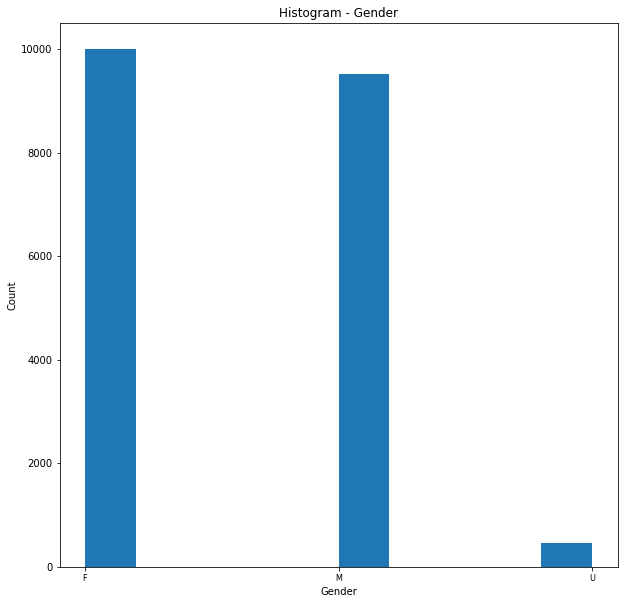

In [100]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.hist(df_imp["gender"])

ax.set_xticks([0,1,2])
ax.set_xticklabels(['F', 'M', 'U'], fontsize=8)

plt.title("Histogram - Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

## job_industry_category

In [28]:
df_imp["job_industry_category"].unique()

array(['Financial Services', 'Health', 'Retail', 'Property',
       'Manufacturing', 'Entertainment', 'IT', nan, 'Argiculture',
       'Telecommunications'], dtype=object)

In [29]:
le_job = LabelEncoder()
df_imp.iloc[:,8] = le_job.fit_transform(df_imp.iloc[:,8])

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\1162364830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp.iloc[:,8] = le_job.fit_transform(df_imp.iloc[:,8])


In [30]:
list(le_job.classes_)

['Argiculture',
 'Entertainment',
 'Financial Services',
 'Health',
 'IT',
 'Manufacturing',
 'Property',
 'Retail',
 'Telecommunications',
 nan]

Text(0, 0.5, 'Count')

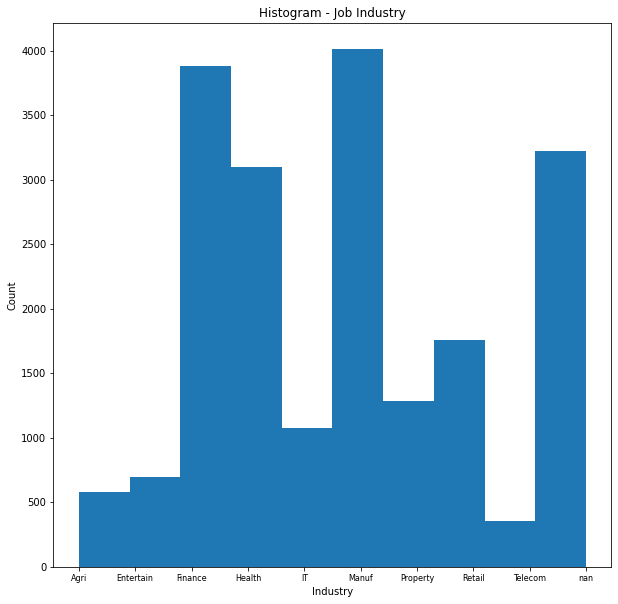

In [110]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.hist(df_imp["job_industry_category"], histtype="bar" )

ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(['Agri','Entertain', 'Finance','Health', 'IT', 'Manuf', 'Property','Retail', 'Telecom', 'nan'], fontsize=8)

plt.title("Histogram - Job Industry")
plt.xlabel("Industry")
plt.ylabel("Count")

## wealth_segment

In [32]:
le_ws = LabelEncoder()
df_imp.iloc[:,9] = le_ws.fit_transform(df_imp.iloc[:,9])

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\3303843067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp.iloc[:,9] = le_ws.fit_transform(df_imp.iloc[:,9])


In [33]:
list(le_ws.classes_)

['Affluent Customer', 'High Net Worth', 'Mass Customer']

Text(0, 0.5, 'Count')

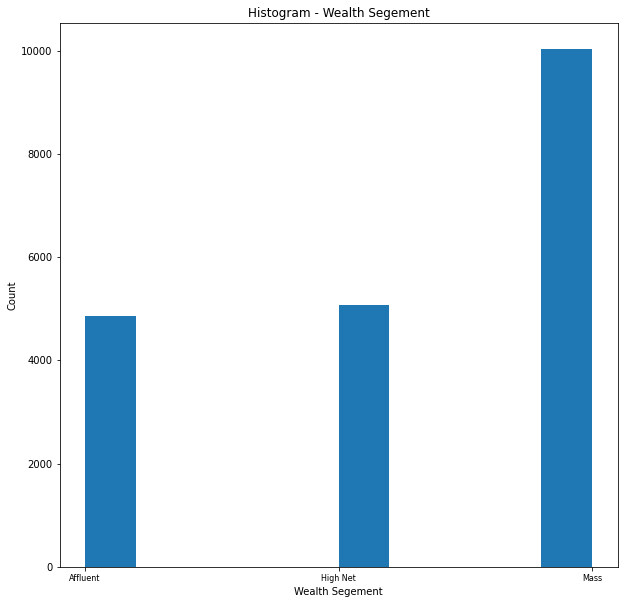

In [112]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.hist(df_imp["wealth_segment"])

ax.set_xticks([0,1,2])
ax.set_xticklabels(['Affluent', 'High Net', 'Mass'], fontsize=8)

plt.title("Histogram - Wealth Segement")
plt.xlabel("Wealth Segement")
plt.ylabel("Count")

## owns_car

In [35]:
le_oc = LabelEncoder()
df_imp.iloc[:,11] = le_oc.fit_transform(df_imp.iloc[:,11])

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\2601391635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp.iloc[:,11] = le_oc.fit_transform(df_imp.iloc[:,11])


In [36]:
list(le_oc.classes_)

['No', 'Yes']

Text(0, 0.5, 'Count')

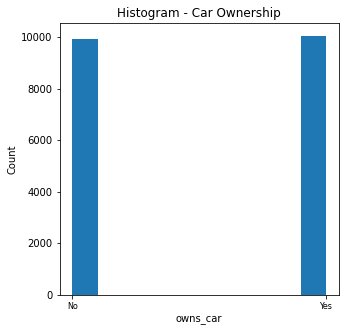

In [114]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.hist(df_imp["owns_car"])

ax.set_xticks([0,1])
ax.set_xticklabels(['No', 'Yes'], fontsize=8)

plt.title("Histogram - Car Ownership")
plt.xlabel("owns_car")
plt.ylabel("Count")

## State

In [38]:
df_imp["state"].unique()

array(['VIC', 'NSW', 'QLD', 'Victoria', 'New South Wales'], dtype=object)

In [39]:
df_imp["state"].replace({'Victoria': 'VIC', 'New South Wales': 'NSW'},inplace=True)

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\2643922295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp["state"].replace({'Victoria': 'VIC', 'New South Wales': 'NSW'},inplace=True)


In [40]:
df_imp["state"].unique()

array(['VIC', 'NSW', 'QLD'], dtype=object)

In [41]:
le_state = LabelEncoder()
df_imp.iloc[:,14] = le_state.fit_transform(df_imp.iloc[:,14])

C:\Users\ankit\AppData\Local\Temp\ipykernel_24520\2974174299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp.iloc[:,14] = le_state.fit_transform(df_imp.iloc[:,14])


In [42]:
list(le_state.classes_)

['NSW', 'QLD', 'VIC']

Text(0, 0.5, 'Count')

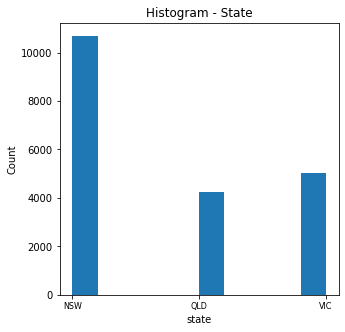

In [115]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.hist(df_imp["state"])

ax.set_xticks([0,1,2])
ax.set_xticklabels(['NSW', 'QLD', 'VIC'], fontsize=8)

plt.title("Histogram - State")
plt.xlabel("state")
plt.ylabel("Count")

# Bivariate Analysis

## Trends in Brand

In [57]:
table_0 = pd.pivot_table(df_imp, values ='profit' ,index=['brand'], columns=['state'], aggfunc="sum")
print(table_0)

state           0          1          2
brand                                  
0       807882.37  355395.95  409146.61
1       460972.91  191391.64  213421.61
2       786442.39  328503.54  365936.49
3      1278625.61  500619.84  632653.24
4      1005179.21  365257.84  464639.42
5      1451238.36  600647.64  695802.73
6            0.00       0.00       0.00


Text(0, 0.5, 'Profit')

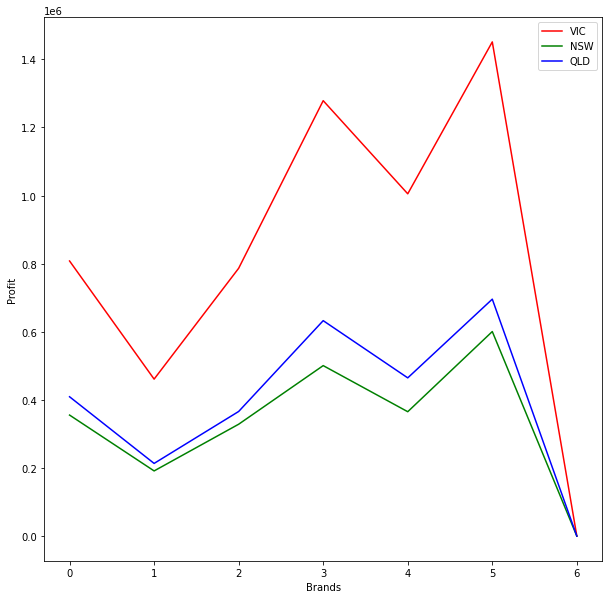

In [68]:
plt.figure(figsize=(10,10))
plt.plot(table_0.index, table_0[0], color='r', label='VIC')
plt.plot(table_0.index, table_0[1], color='g', label='NSW')
plt.plot(table_0.index, table_0[2], color='b', label='QLD')
plt.legend()
plt.xlabel("Brands")
plt.ylabel("Profit")

['Giant Bicycles',
 'Norco Bicycles',
 'OHM Cycles',
 'Solex',
 'Trek Bicycles',
 'WeareA2B',
 nan]

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

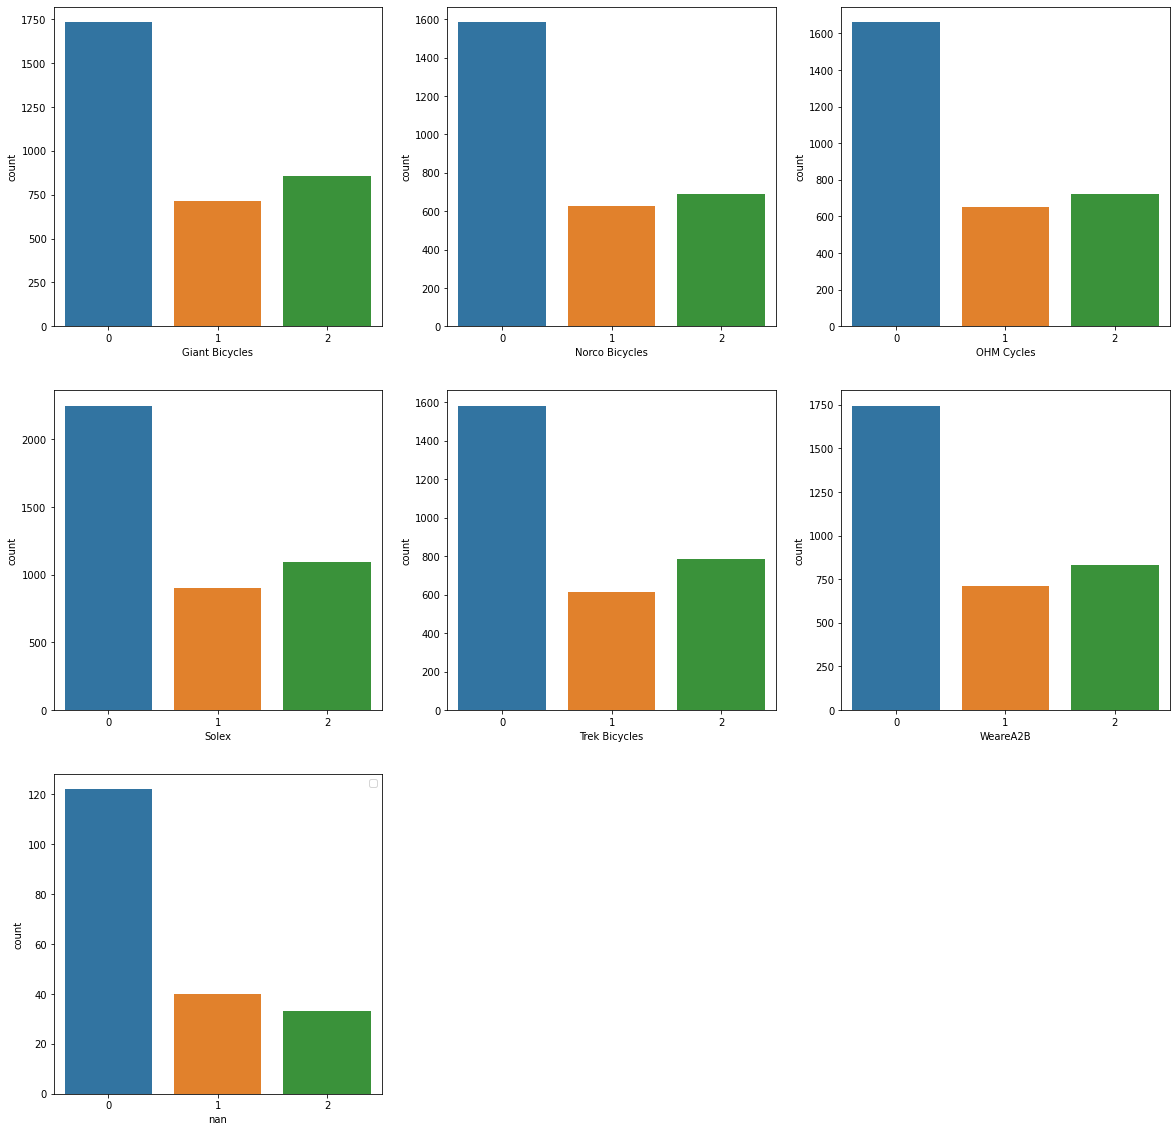

In [120]:
plt.figure(figsize = (20, 20))

plt.subplot(3,3,1)
sns.countplot(df_imp[df_imp['brand']==0]['state'])
plt.xlabel("Giant Bicycles")

plt.subplot(3,3,2)
sns.countplot(df_imp[df_imp['brand']==1]['state'])
plt.xlabel("Norco Bicycles")

plt.subplot(3,3,3)
sns.countplot(df_imp[df_imp['brand']==2]['state'])
plt.xlabel("OHM Cycles")

plt.subplot(3,3,4)
sns.countplot(df_imp[df_imp['brand']==3]['state'])
plt.xlabel("Solex")

plt.subplot(3,3,5)
sns.countplot(df_imp[df_imp['brand']==4]['state'])
plt.xlabel("Trek Bicycles")

plt.subplot(3,3,6)
sns.countplot(df_imp[df_imp['brand']==5]['state'])
plt.xlabel("WeareA2B")

plt.subplot(3,3,7)
sns.countplot(df_imp[df_imp['brand']==6]['state'])
plt.xlabel("nan")


c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

Text(0.5, 0, 'nan')

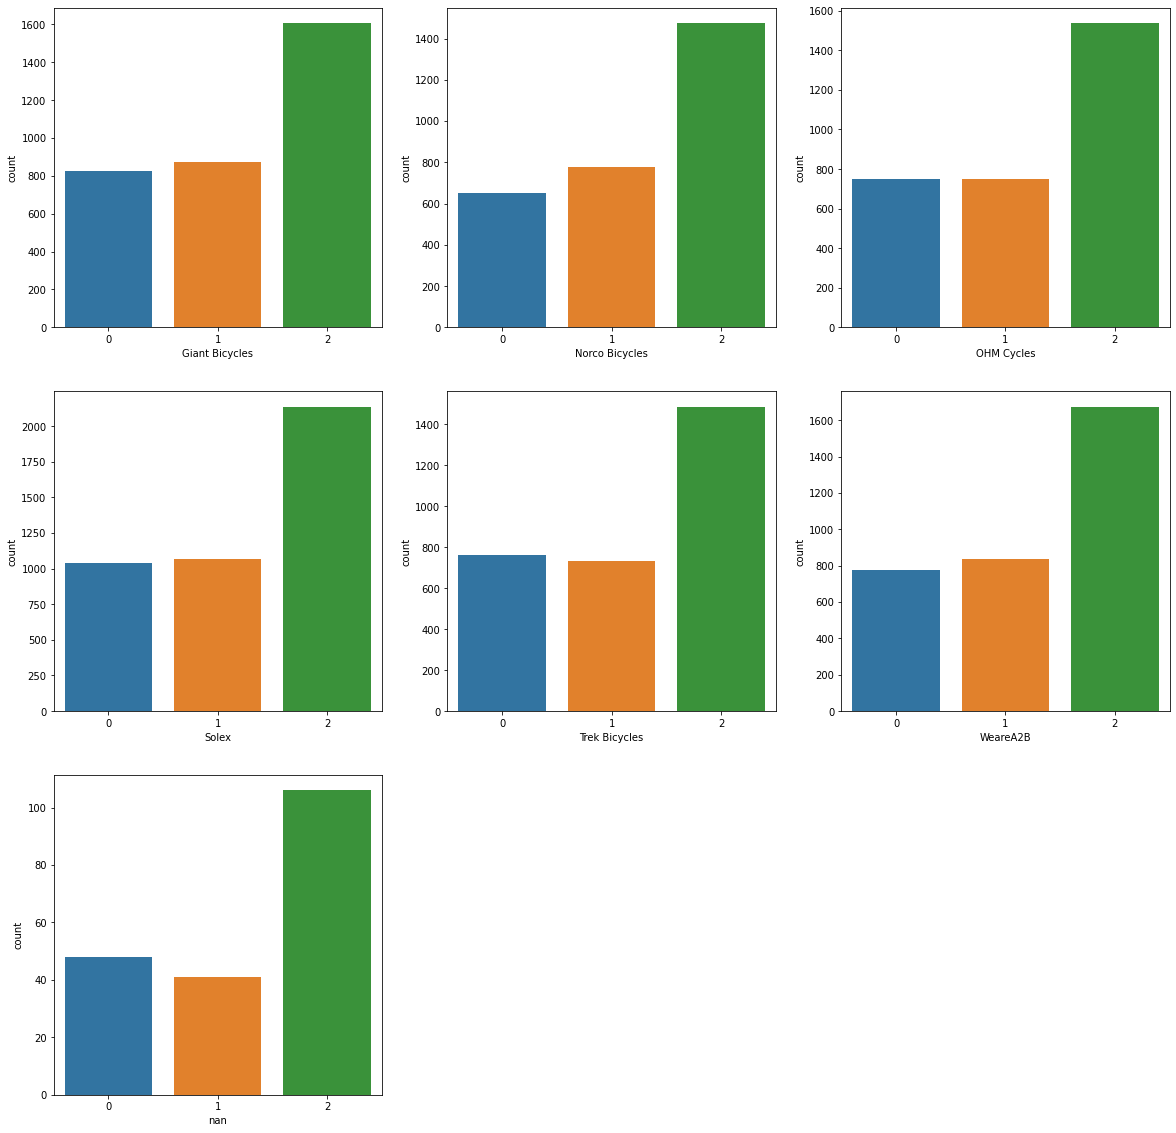

In [121]:
plt.figure(figsize = (20, 20))
plt.subplot(3,3,1)
sns.countplot(df_imp[df_imp['brand']==0]['wealth_segment'])
plt.xlabel("Giant Bicycles")

plt.subplot(3,3,2)
sns.countplot(df_imp[df_imp['brand']==1]['wealth_segment'])
plt.xlabel("Norco Bicycles")

plt.subplot(3,3,3)
sns.countplot(df_imp[df_imp['brand']==2]['wealth_segment'])
plt.xlabel("OHM Cycles")

plt.subplot(3,3,4)
sns.countplot(df_imp[df_imp['brand']==3]['wealth_segment'])
plt.xlabel("Solex")

plt.subplot(3,3,5)
sns.countplot(df_imp[df_imp['brand']==4]['wealth_segment'])
plt.xlabel("Trek Bicycles")

plt.subplot(3,3,6)
sns.countplot(df_imp[df_imp['brand']==5]['wealth_segment'])
plt.xlabel("WeareA2B")

plt.subplot(3,3,7)
sns.countplot(df_imp[df_imp['brand']==6]['wealth_segment'])
plt.xlabel("nan")

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

Text(0.5, 0, 'nan')

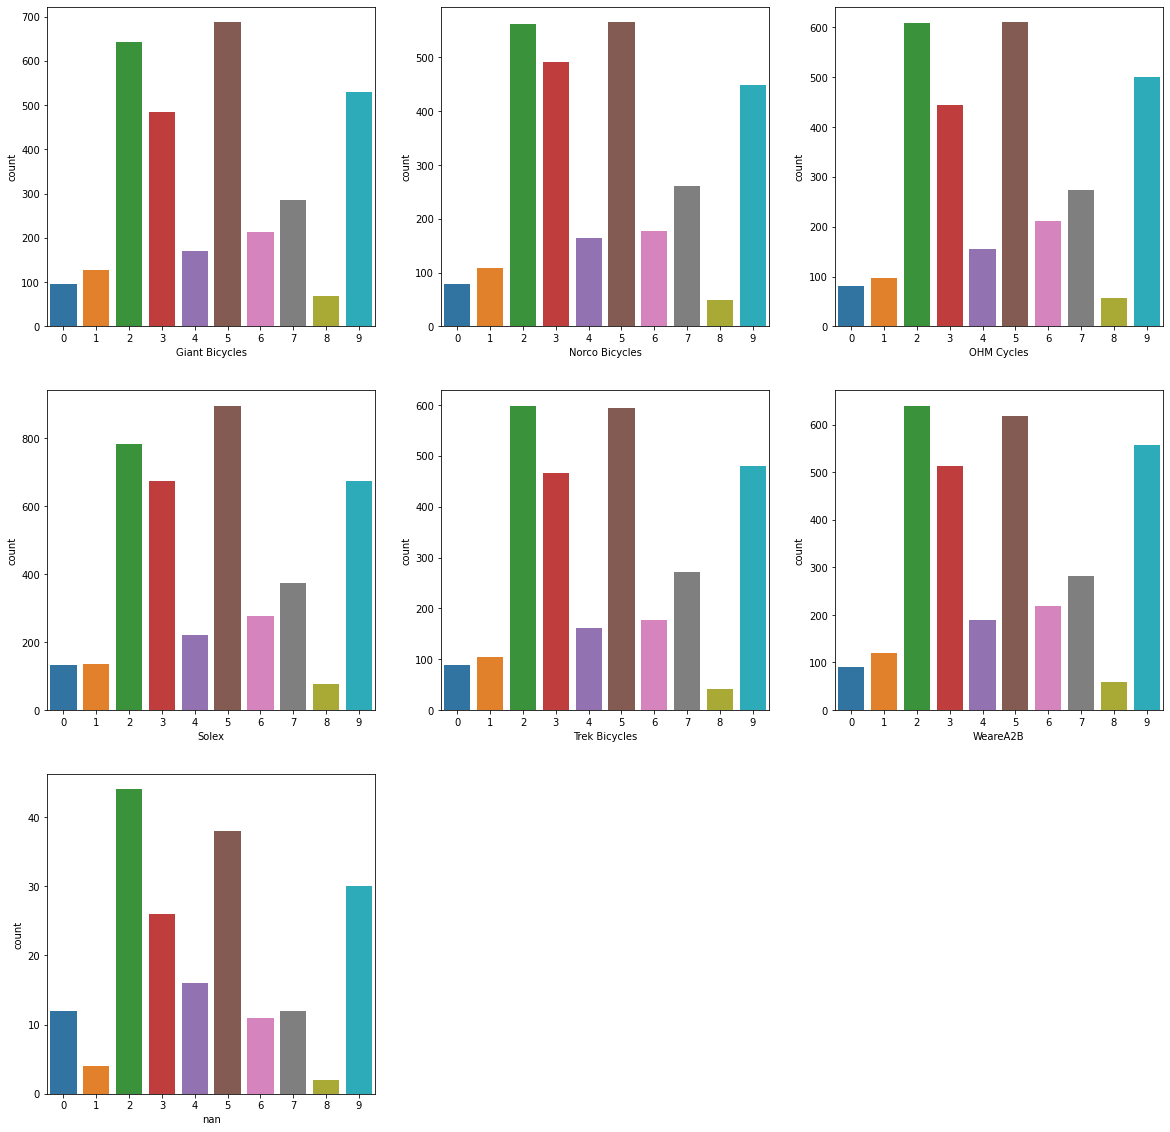

In [122]:
plt.figure(figsize = (20, 20))
plt.subplot(3,3,1)
sns.countplot(df_imp[df_imp['brand']==0]['job_industry_category'])
plt.xlabel("Giant Bicycles")

plt.subplot(3,3,2)
sns.countplot(df_imp[df_imp['brand']==1]['job_industry_category'])
plt.xlabel("Norco Bicycles")

plt.subplot(3,3,3)
sns.countplot(df_imp[df_imp['brand']==2]['job_industry_category'])
plt.xlabel("OHM Cycles")

plt.subplot(3,3,4)
sns.countplot(df_imp[df_imp['brand']==3]['job_industry_category'])
plt.xlabel("Solex")

plt.subplot(3,3,5)
sns.countplot(df_imp[df_imp['brand']==4]['job_industry_category'])
plt.xlabel("Trek Bicycles")

plt.subplot(3,3,6)
sns.countplot(df_imp[df_imp['brand']==5]['job_industry_category'])
plt.xlabel("WeareA2B")

plt.subplot(3,3,7)
sns.countplot(df_imp[df_imp['brand']==6]['job_industry_category'])
plt.xlabel("nan")

## Trends in State

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

Text(0.5, 1.0, 'State - VIC')

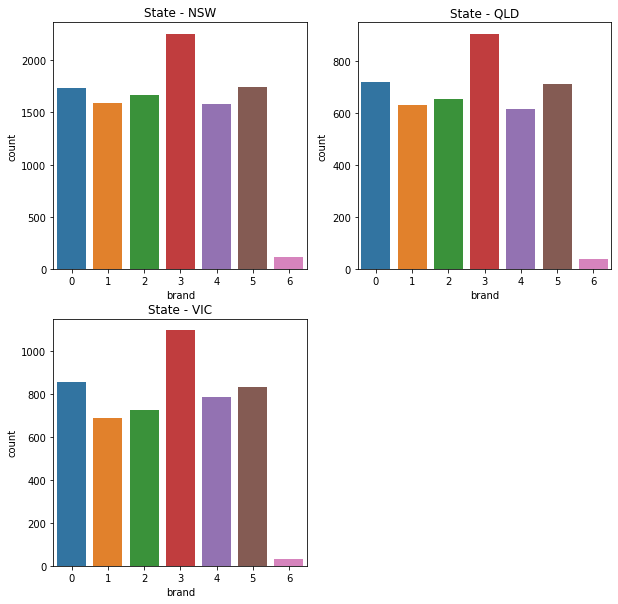

In [48]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
sns.countplot(df_imp[df_imp['state']==0]['brand'])
plt.title("State - NSW")

plt.subplot(2,2,2)
sns.countplot(df_imp[df_imp['state']==1]['brand'])
plt.title("State - QLD")

plt.subplot(2,2,3)
sns.countplot(df_imp[df_imp['state']==2]['brand'])
plt.title("State - VIC")

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

Text(0.5, 1.0, 'State - VIC')

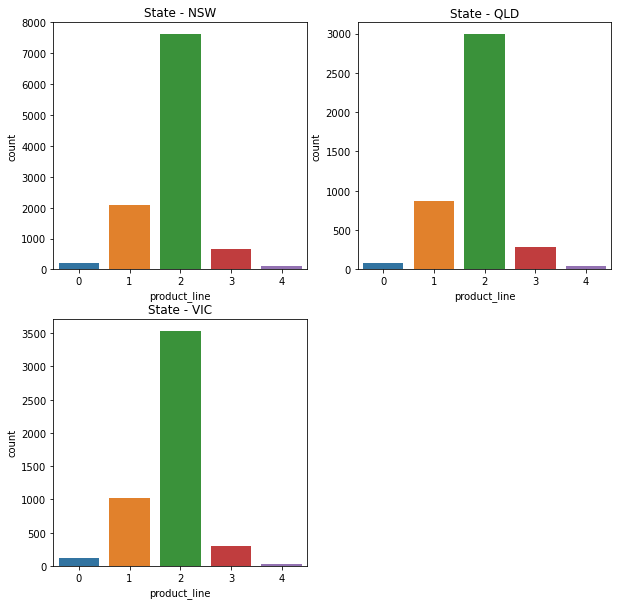

In [49]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
sns.countplot(df_imp[df_imp['state']==0]['product_line'])
plt.title("State - NSW")

plt.subplot(2,2,2)
sns.countplot(df_imp[df_imp['state']==1]['product_line'])
plt.title("State - QLD")

plt.subplot(2,2,3)
sns.countplot(df_imp[df_imp['state']==2]['product_line'])
plt.title("State - VIC")

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

Text(0.5, 1.0, 'State - VIC')

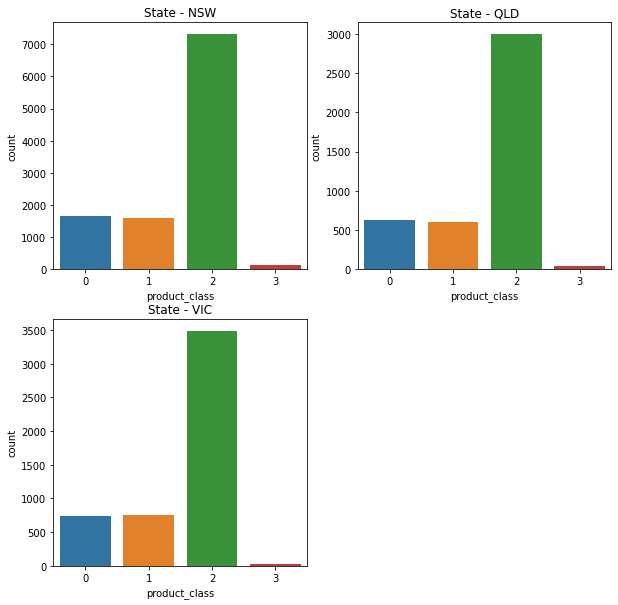

In [50]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
sns.countplot(df_imp[df_imp['state']==0]['product_class'])
plt.title("State - NSW")

plt.subplot(2,2,2)
sns.countplot(df_imp[df_imp['state']==1]['product_class'])
plt.title("State - QLD")

plt.subplot(2,2,3)
sns.countplot(df_imp[df_imp['state']==2]['product_class'])
plt.title("State - VIC")

## Trends in Job Industry Category

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

Text(0.5, 1.0, 'Category - nan')

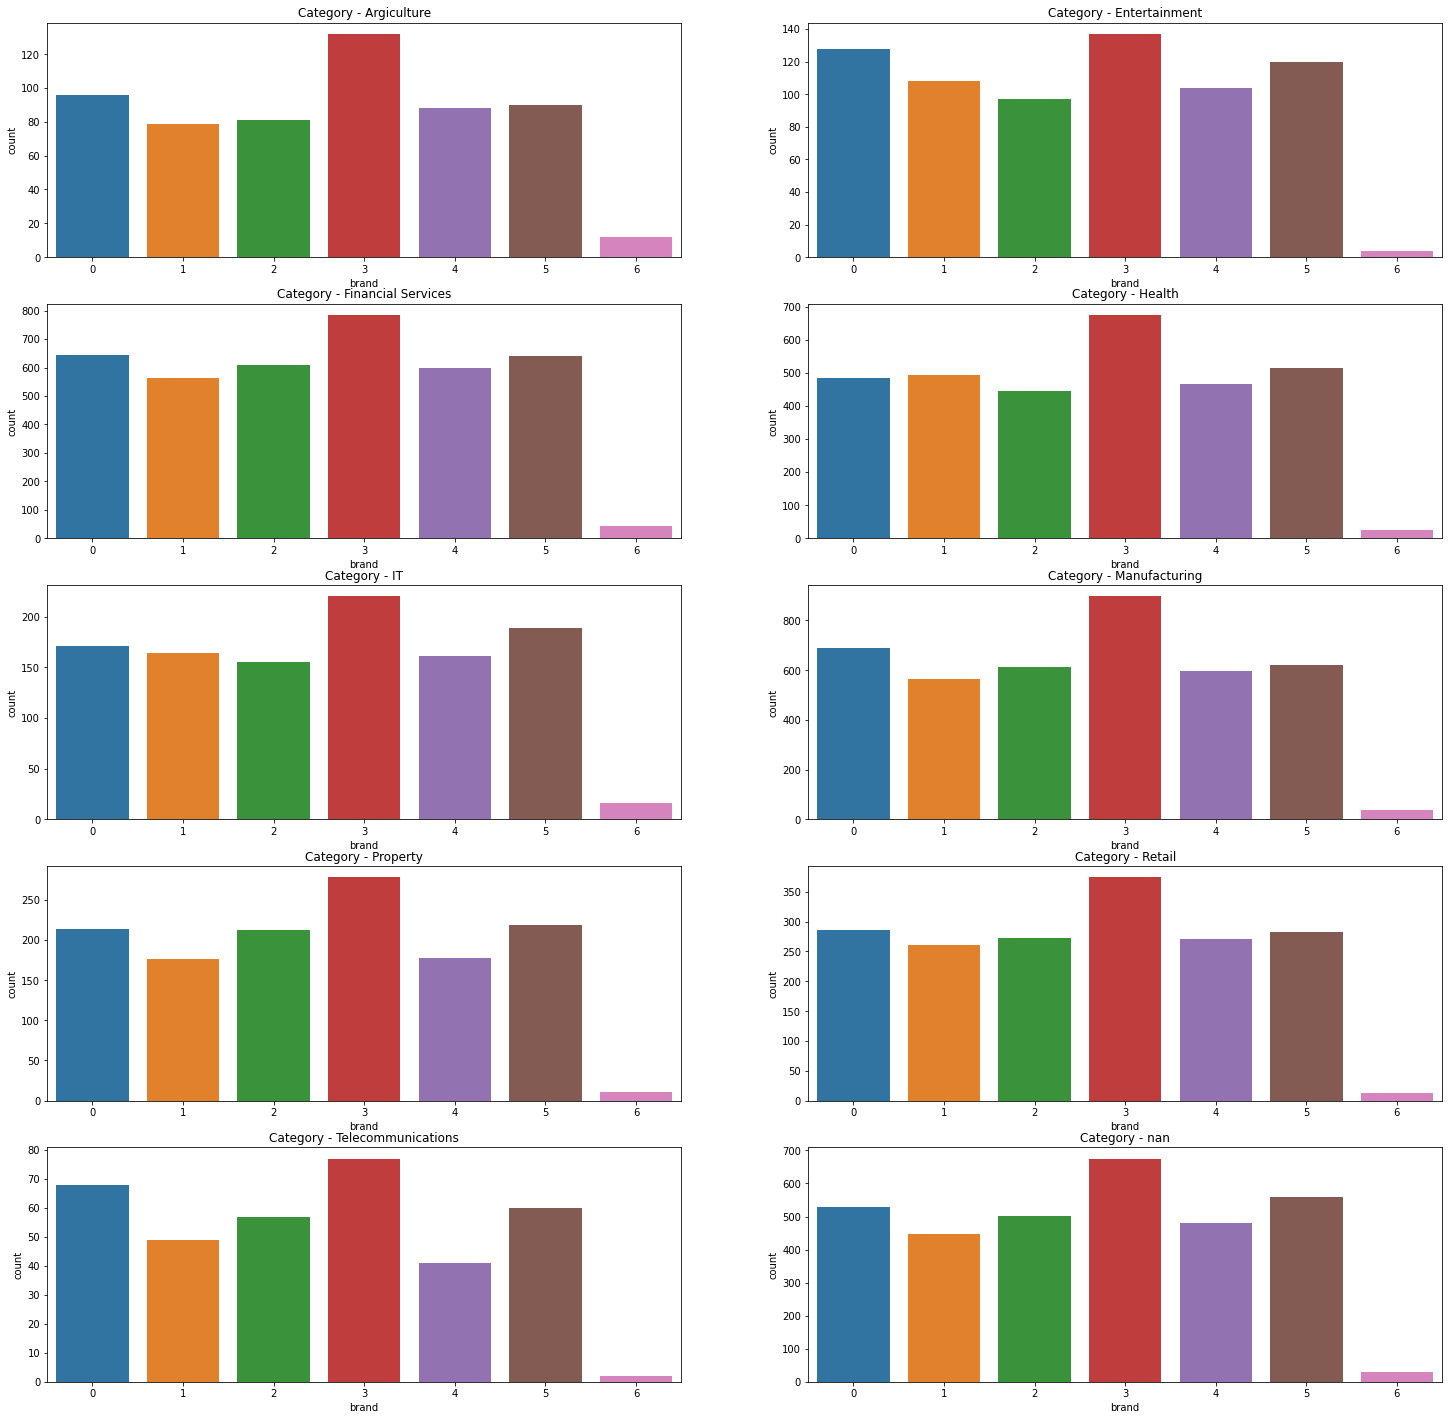

In [51]:
plt.figure(figsize = (25, 25))
plt.subplot(5,2,1)
sns.countplot(df_imp[df_imp['job_industry_category']==0]['brand'])
plt.title("Category - Argiculture")

plt.subplot(5,2,2)
sns.countplot(df_imp[df_imp['job_industry_category']==1]['brand'])
plt.title("Category - Entertainment")

plt.subplot(5,2,3)
sns.countplot(df_imp[df_imp['job_industry_category']==2]['brand'])
plt.title("Category - Financial Services")

plt.subplot(5,2,4)
sns.countplot(df_imp[df_imp['job_industry_category']==3]['brand'])
plt.title("Category - Health")

plt.subplot(5,2,5)
sns.countplot(df_imp[df_imp['job_industry_category']==4]['brand'])
plt.title("Category - IT")

plt.subplot(5,2,6)
sns.countplot(df_imp[df_imp['job_industry_category']==5]['brand'])
plt.title("Category - Manufacturing")

plt.subplot(5,2,7)
sns.countplot(df_imp[df_imp['job_industry_category']==6]['brand'])
plt.title("Category - Property")

plt.subplot(5,2,8)
sns.countplot(df_imp[df_imp['job_industry_category']==7]['brand'])
plt.title("Category - Retail")

plt.subplot(5,2,9)
sns.countplot(df_imp[df_imp['job_industry_category']==8]['brand'])
plt.title("Category - Telecommunications")

plt.subplot(5,2,10)
sns.countplot(df_imp[df_imp['job_industry_category']==9]['brand'])
plt.title("Category - nan")

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

Text(0.5, 1.0, 'Category - nan')

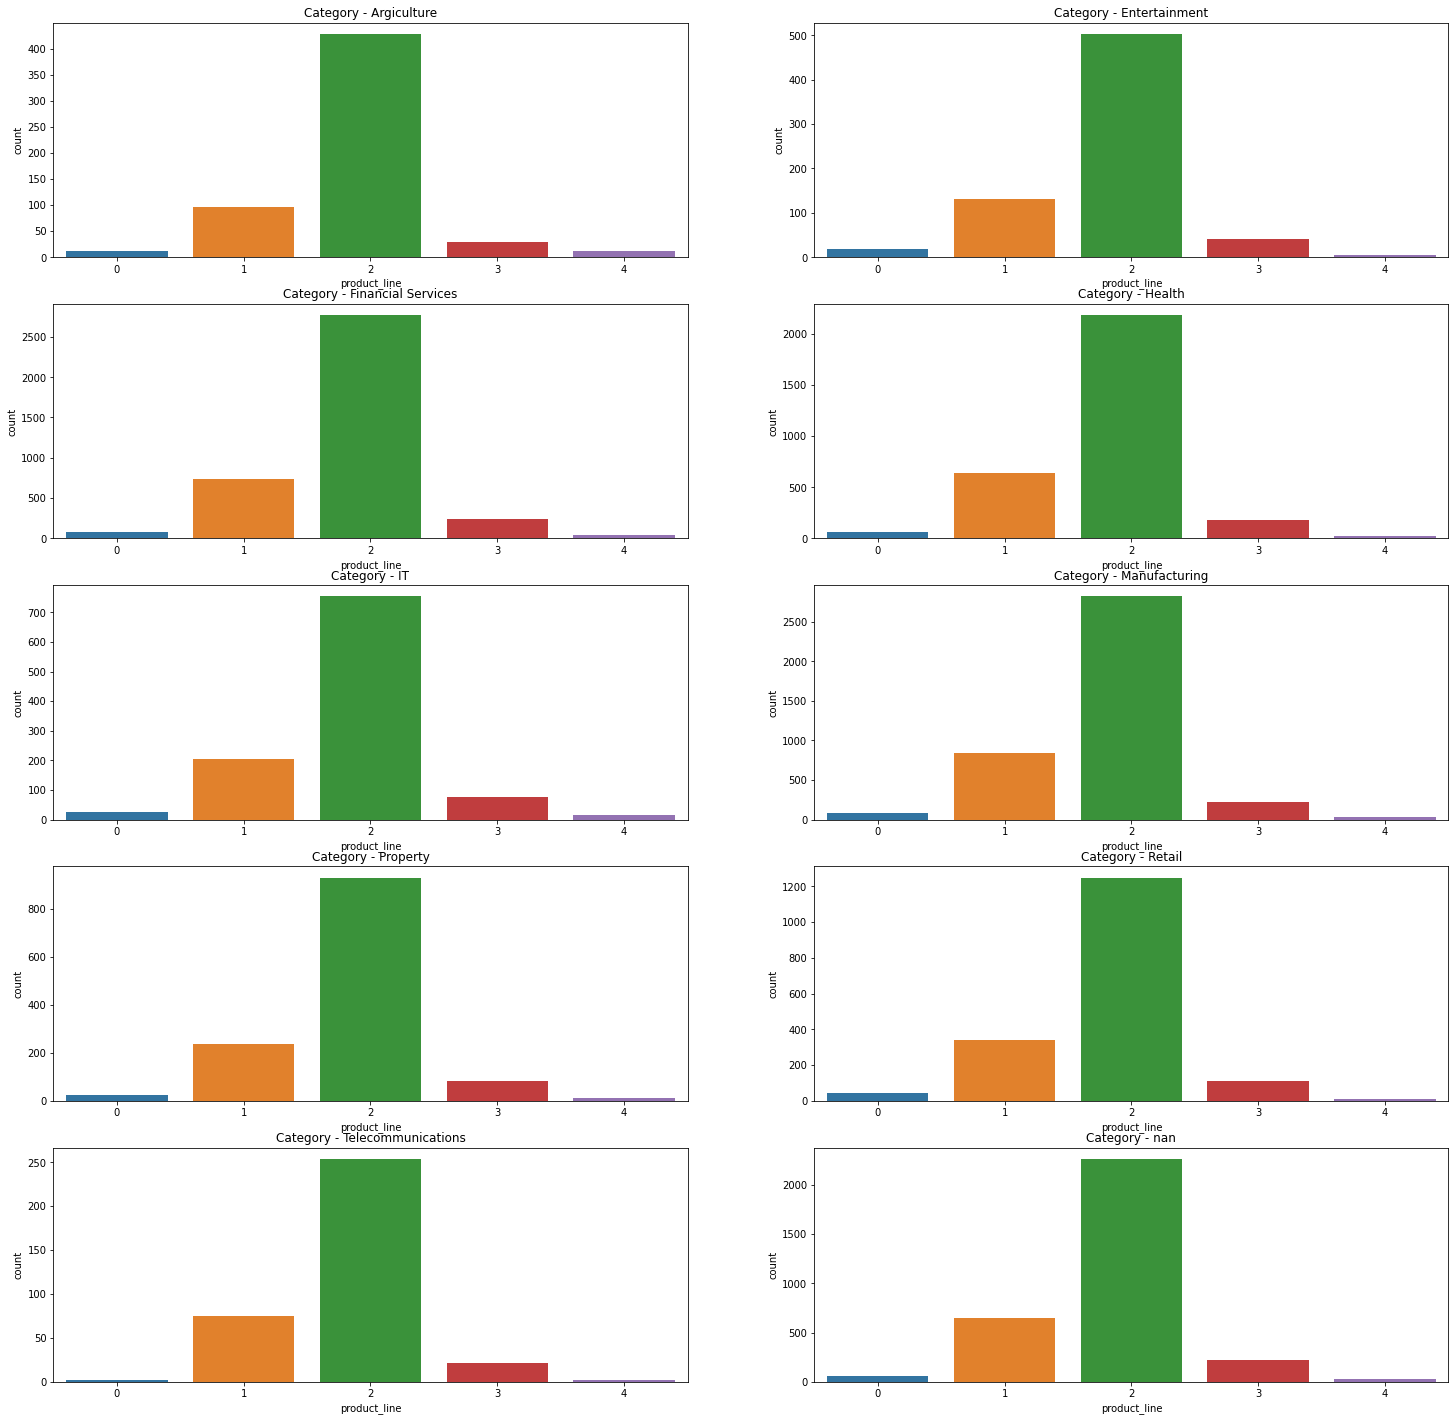

In [52]:
plt.figure(figsize = (25, 25))
plt.subplot(5,2,1)
sns.countplot(df_imp[df_imp['job_industry_category']==0]['product_line'])
plt.title("Category - Argiculture")

plt.subplot(5,2,2)
sns.countplot(df_imp[df_imp['job_industry_category']==1]['product_line'])
plt.title("Category - Entertainment")

plt.subplot(5,2,3)
sns.countplot(df_imp[df_imp['job_industry_category']==2]['product_line'])
plt.title("Category - Financial Services")

plt.subplot(5,2,4)
sns.countplot(df_imp[df_imp['job_industry_category']==3]['product_line'])
plt.title("Category - Health")

plt.subplot(5,2,5)
sns.countplot(df_imp[df_imp['job_industry_category']==4]['product_line'])
plt.title("Category - IT")

plt.subplot(5,2,6)
sns.countplot(df_imp[df_imp['job_industry_category']==5]['product_line'])
plt.title("Category - Manufacturing")

plt.subplot(5,2,7)
sns.countplot(df_imp[df_imp['job_industry_category']==6]['product_line'])
plt.title("Category - Property")

plt.subplot(5,2,8)
sns.countplot(df_imp[df_imp['job_industry_category']==7]['product_line'])
plt.title("Category - Retail")

plt.subplot(5,2,9)
sns.countplot(df_imp[df_imp['job_industry_category']==8]['product_line'])
plt.title("Category - Telecommunications")

plt.subplot(5,2,10)
sns.countplot(df_imp[df_imp['job_industry_category']==9]['product_line'])
plt.title("Category - nan")

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

Text(0.5, 1.0, 'Category - nan')

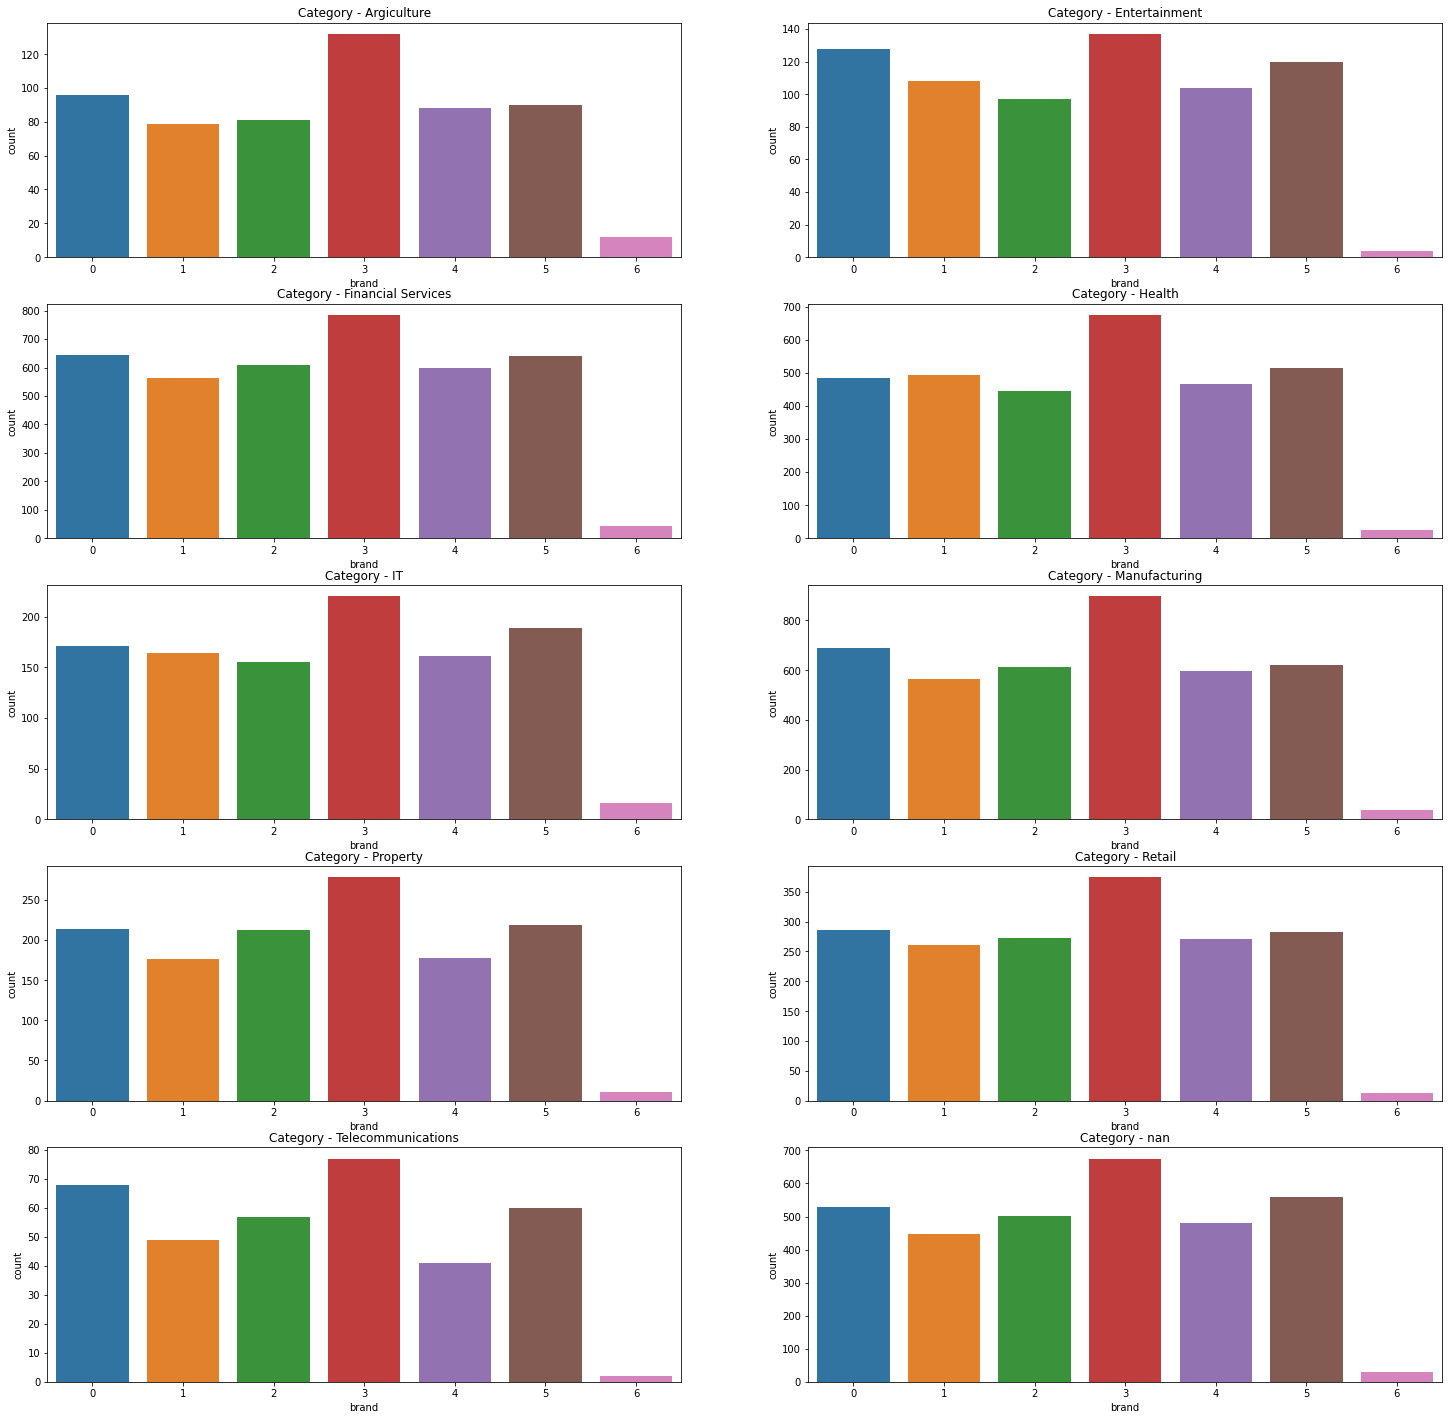

In [123]:
plt.figure(figsize = (25, 25))
plt.subplot(5,2,1)
sns.countplot(df_imp[df_imp['job_industry_category']==0]['brand'])
plt.title("Category - Argiculture")

plt.subplot(5,2,2)
sns.countplot(df_imp[df_imp['job_industry_category']==1]['brand'])
plt.title("Category - Entertainment")

plt.subplot(5,2,3)
sns.countplot(df_imp[df_imp['job_industry_category']==2]['brand'])
plt.title("Category - Financial Services")

plt.subplot(5,2,4)
sns.countplot(df_imp[df_imp['job_industry_category']==3]['brand'])
plt.title("Category - Health")

plt.subplot(5,2,5)
sns.countplot(df_imp[df_imp['job_industry_category']==4]['brand'])
plt.title("Category - IT")

plt.subplot(5,2,6)
sns.countplot(df_imp[df_imp['job_industry_category']==5]['brand'])
plt.title("Category - Manufacturing")

plt.subplot(5,2,7)
sns.countplot(df_imp[df_imp['job_industry_category']==6]['brand'])
plt.title("Category - Property")

plt.subplot(5,2,8)
sns.countplot(df_imp[df_imp['job_industry_category']==7]['brand'])
plt.title("Category - Retail")

plt.subplot(5,2,9)
sns.countplot(df_imp[df_imp['job_industry_category']==8]['brand'])
plt.title("Category - Telecommunications")

plt.subplot(5,2,10)
sns.countplot(df_imp[df_imp['job_industry_category']==9]['brand'])
plt.title("Category - nan")

In [133]:
table_0 = pd.pivot_table(df_imp, values ='profit' ,index=['job_industry_category'], columns=['state'], aggfunc="sum")
print(table_0)

state                           0          1          2
job_industry_category                                  
0                       160639.70  102637.56   39714.09
1                       175101.97   97969.84  113037.64
2                      1105207.10  539754.03  505255.77
3                       936603.53  277184.70  453857.30
4                       340622.02   98233.84  162522.72
5                      1104431.67  467122.18  596164.31
6                       395461.32  135250.26  169427.67
7                       537381.37  234013.54  210616.45
8                        97193.87   44434.58   45771.56
9                       937698.30  345215.92  485232.59


Text(0, 0.5, 'Profit')

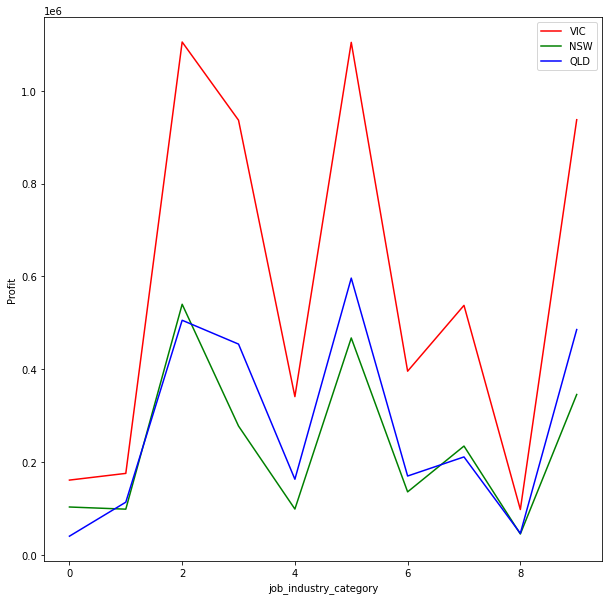

In [134]:
plt.figure(figsize=(10,10))
plt.plot(table_0.index, table_0[0], color='r', label='VIC')
plt.plot(table_0.index, table_0[1], color='g', label='NSW')
plt.plot(table_0.index, table_0[2], color='b', label='QLD')
plt.legend()
plt.xlabel("job_industry_category")
plt.ylabel("Profit")

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job_industry_category', ylabel='standard_cost'>

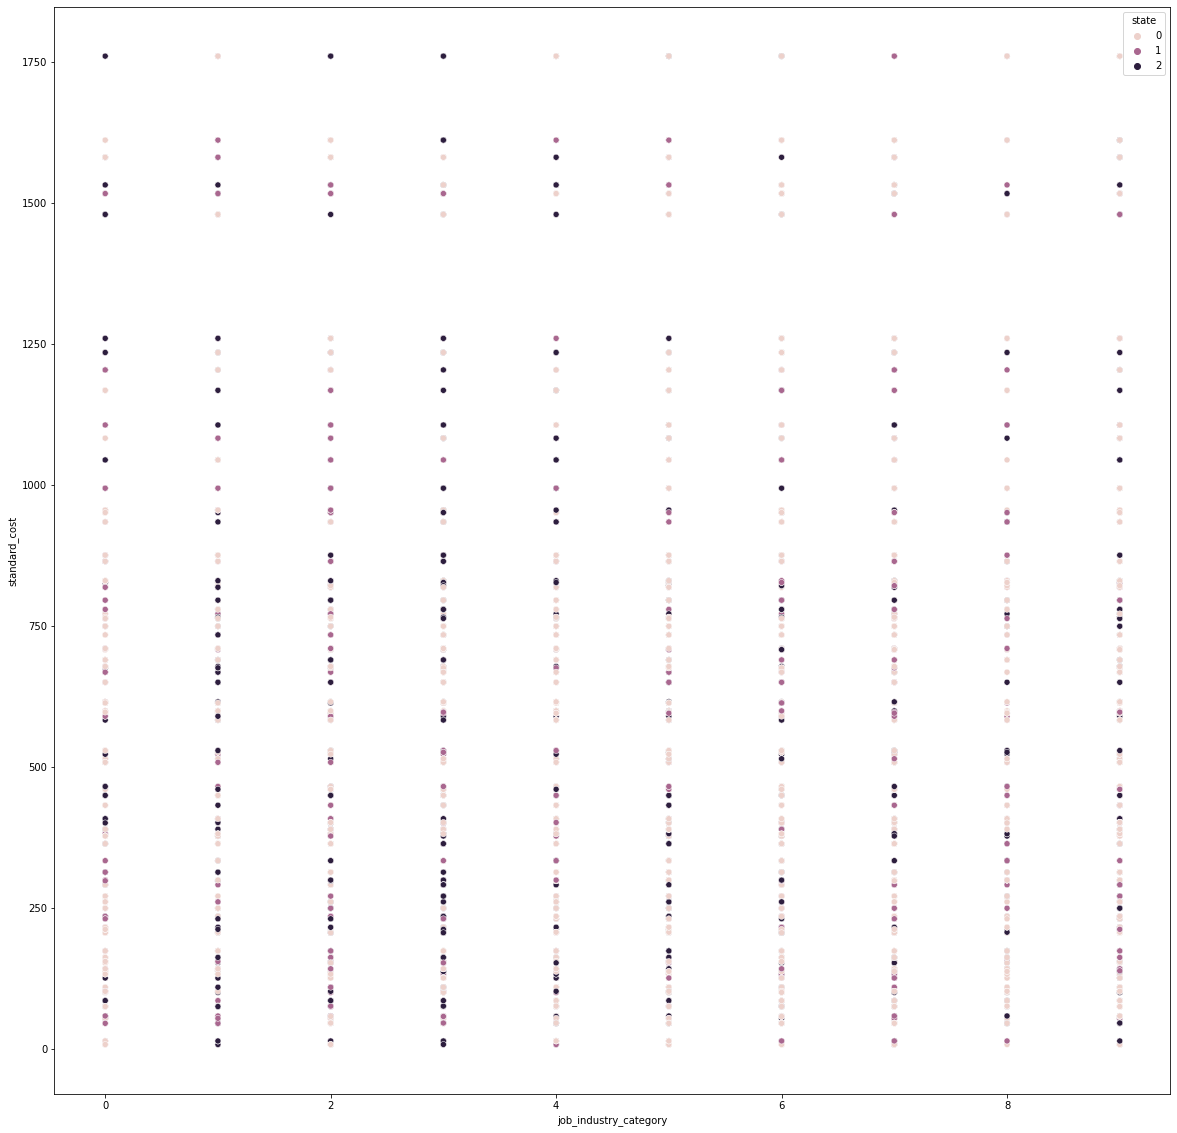

In [54]:
plt.figure(figsize = (20, 20))
sns.scatterplot(df_imp['job_industry_category'],df_imp['standard_cost'], hue=df_imp['state'])

## Trends in Wealth Segement

In [131]:
table_0 = pd.pivot_table(df_imp, values ='profit' ,index=['brand'], columns=['wealth_segment'], aggfunc="sum")
print(table_0)

wealth_segment          0          1           2
brand                                           
0               395581.95  411113.25   765729.73
1               200127.15  222221.13   443437.88
2               362469.65  370470.39   747942.38
3               600392.45  617338.28  1194167.96
4               484474.26  453233.48   897368.73
5               634965.41  691766.95  1420956.37
6                    0.00       0.00        0.00


Text(0, 0.5, 'Profit')

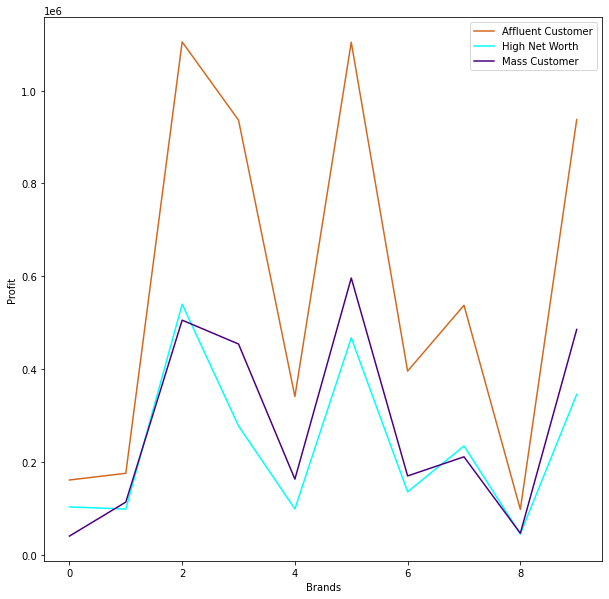

In [135]:
plt.figure(figsize=(10,10))
plt.plot(table_0.index, table_0[0], color='chocolate', label='Affluent Customer')
plt.plot(table_0.index, table_0[1], color='aqua', label='High Net Worth')
plt.plot(table_0.index, table_0[2], color='indigo', label='Mass Customer')
plt.legend()
plt.xlabel("Brands")
plt.ylabel("Profit")

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

Text(0.5, 0, 'Mass Customer')

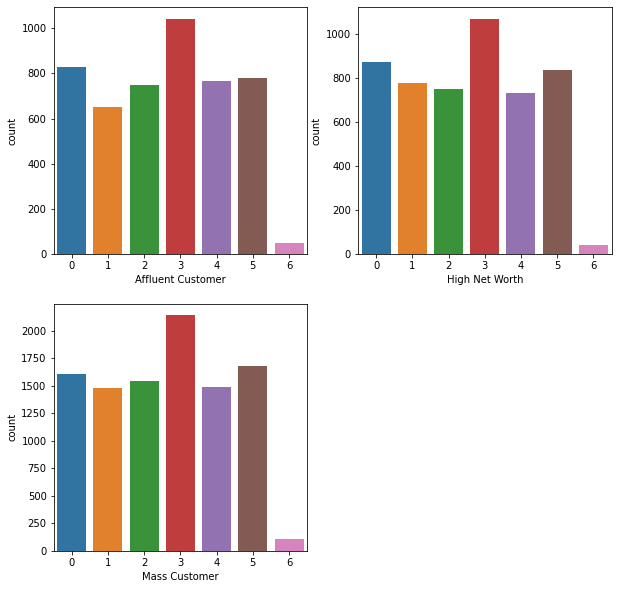

In [136]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
sns.countplot(df_imp[df_imp['wealth_segment']==0]['brand'])
plt.xlabel("Affluent Customer")

plt.subplot(2,2,2)
sns.countplot(df_imp[df_imp['wealth_segment']==1]['brand'])
plt.xlabel("High Net Worth")

plt.subplot(2,2,3)
sns.countplot(df_imp[df_imp['wealth_segment']==2]['brand'])
plt.xlabel("Mass Customer")

## property_valuation

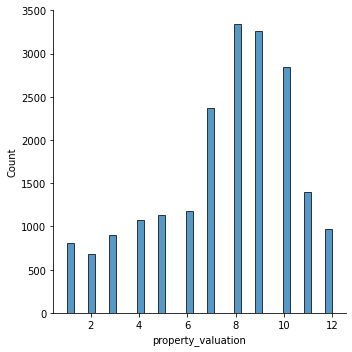

In [56]:
sns.displot(df["property_valuation"])